In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Image loaded successfully: (769, 765)


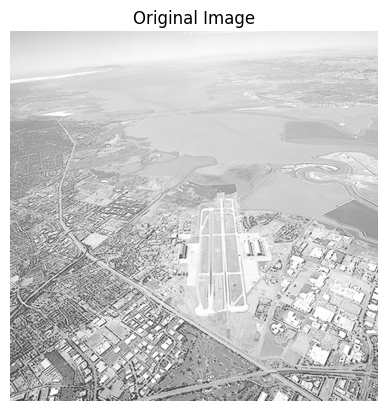

In [61]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_path = '/content/drive/MyDrive/IN4640/Images/originals/runway.png'

img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)

if img is None:
    raise ValueError("Image not loaded. Check path or file name.")

print("Image loaded successfully:", img.shape)

plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()


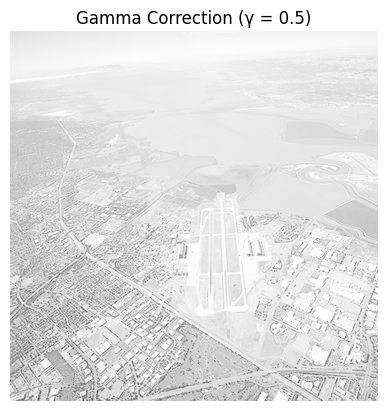

In [62]:
img_n = img.astype(np.float32) / 255.0

gamma_05 = img_n ** 0.5

plt.imshow(gamma_05, cmap='gray')
plt.title('Gamma Correction (γ = 0.5)')
plt.axis('off')
plt.show()

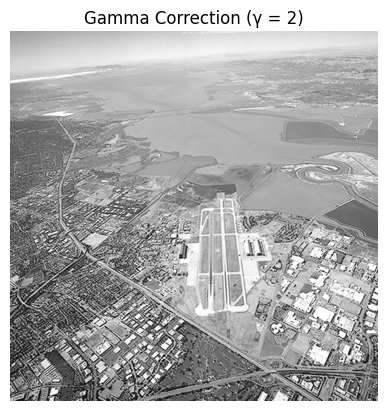

In [63]:
gamma_2 = img_n ** 2

plt.imshow(gamma_2, cmap='gray')
plt.title('Gamma Correction (γ = 2)')
plt.axis('off')
plt.show()

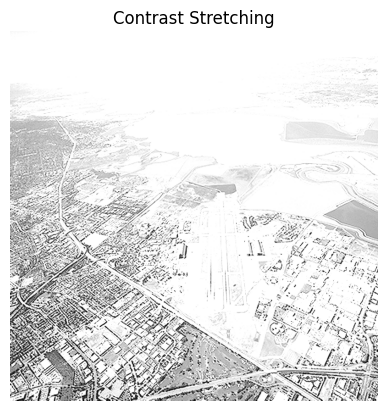

In [64]:
r1, r2 = 0.2, 0.8
contrast = np.zeros_like(img_n)

contrast[img_n < r1] = 0
contrast[(img_n >= r1) & (img_n <= r2)] = (img_n[(img_n >= r1) & (img_n <= r2)] - r1) / (r2 - r1)
contrast[img_n > r2] = 1

plt.imshow(contrast, cmap='gray')
plt.title('Contrast Stretching')
plt.axis('off')
plt.show()

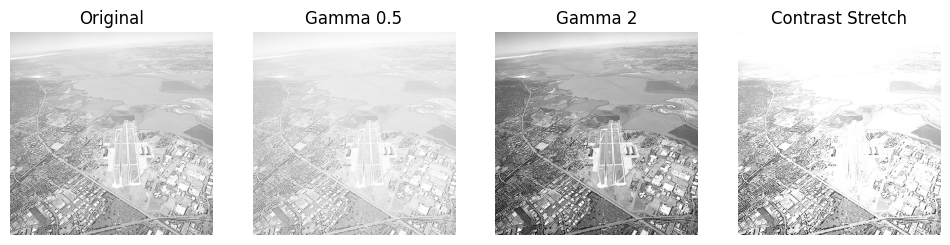

In [65]:
plt.figure(figsize=(12,4))

plt.subplot(1,4,1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(gamma_05, cmap='gray')
plt.title('Gamma 0.5')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(gamma_2, cmap='gray')
plt.title('Gamma 2')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(contrast, cmap='gray')
plt.title('Contrast Stretch')
plt.axis('off')

plt.show()

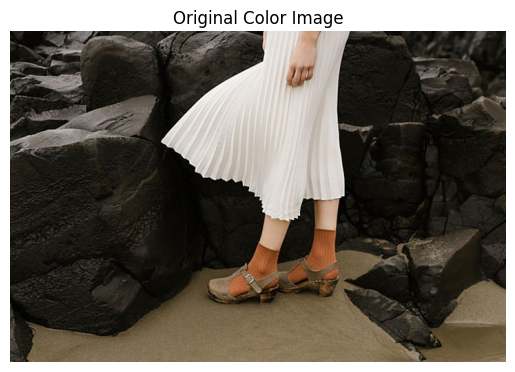

In [66]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_color = cv.imread(
    '/content/drive/MyDrive/IN4640/Images/originals/highlights_and_shadows.jpg'
)

if img_color is None:
    raise ValueError("Color image not loaded. Check path.")

# Convert BGR (OpenCV default) → RGB for display
img_rgb = cv.cvtColor(img_color, cv.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title('Original Color Image')
plt.axis('off')
plt.show()

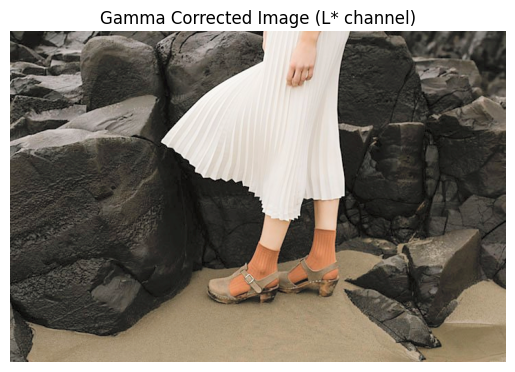

In [67]:
lab = cv.cvtColor(img_color, cv.COLOR_BGR2LAB)
L, a, b = cv.split(lab)

L_n = L.astype(np.float32) / 255.0

gamma = 0.6
L_gamma = (L_n ** gamma) * 255.0
L_gamma = L_gamma.astype(np.uint8)

lab_gamma = cv.merge((L_gamma, a, b))
img_gamma_bgr = cv.cvtColor(lab_gamma, cv.COLOR_LAB2BGR)
img_gamma_rgb = cv.cvtColor(img_gamma_bgr, cv.COLOR_BGR2RGB)

plt.imshow(img_gamma_rgb)
plt.title('Gamma Corrected Image (L* channel)')
plt.axis('off')
plt.show()

Text(0, 0.5, 'Frequency')

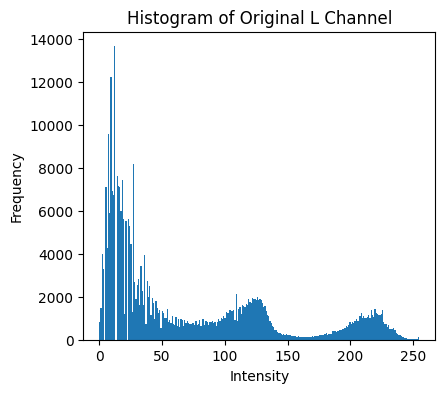

In [68]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(L.flatten(), bins=256, range=(0,255))
plt.title('Histogram of Original L Channel')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

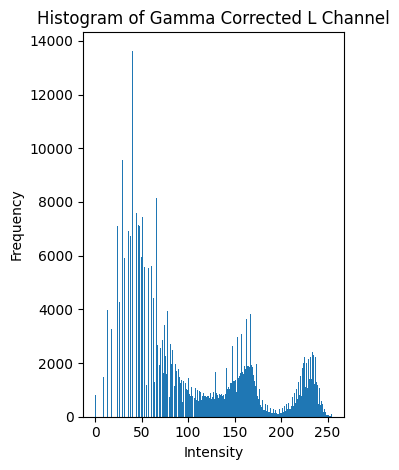

In [69]:
plt.subplot(1,2,2)
plt.hist(L_gamma.flatten(), bins=256, range=(0,255))
plt.title('Histogram of Gamma Corrected L Channel')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

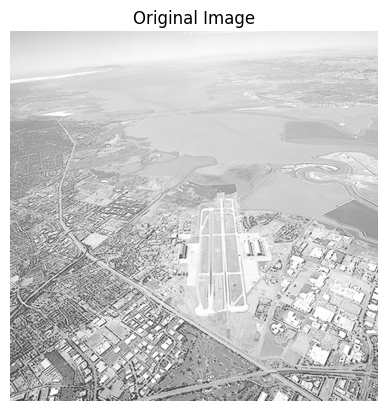

In [70]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(
    '/content/drive/MyDrive/IN4640/Images/originals/runway.png',
    cv.IMREAD_GRAYSCALE
)

if img is None:
    raise ValueError("Image not loaded. Check path.")

plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

In [71]:
def manual_hist_equalization(gray_img):
    # 1. Compute histogram
    hist, bins = np.histogram(gray_img.flatten(), 256, [0, 256])

    # 2. Compute cumulative distribution function (CDF)
    cdf = hist.cumsum()

    # 3. Normalize CDF to [0, 255]
    cdf_normalized = cdf * 255 / cdf[-1]

    # 4. Map old intensities to new values
    img_eq = np.interp(gray_img.flatten(), bins[:-1], cdf_normalized)

    # 5. Reshape back to image
    img_eq = img_eq.reshape(gray_img.shape).astype(np.uint8)

    return img_eq

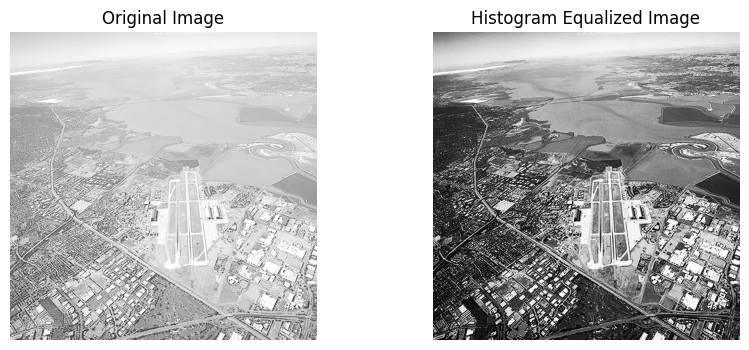

In [72]:
img_eq = manual_hist_equalization(img)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_eq, cmap='gray')
plt.title('Histogram Equalized Image')
plt.axis('off')

plt.show()

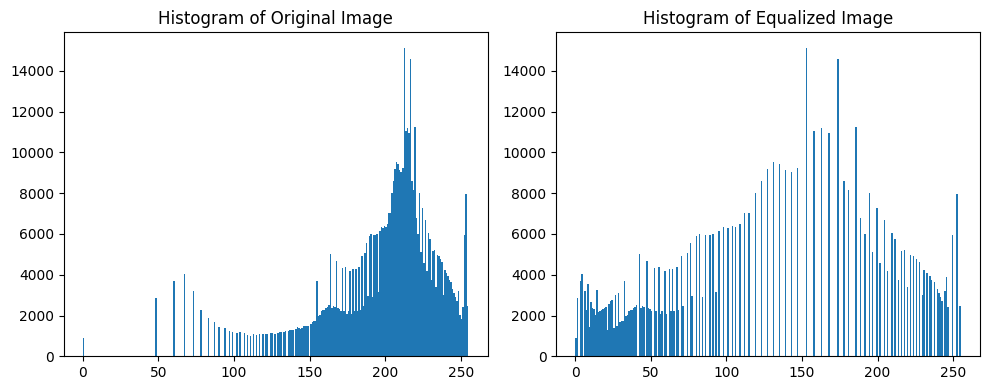

In [73]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(img.flatten(), bins=256, range=(0,255))
plt.title('Histogram of Original Image')

plt.subplot(1,2,2)
plt.hist(img_eq.flatten(), bins=256, range=(0,255))
plt.title('Histogram of Equalized Image')

plt.tight_layout()
plt.show()

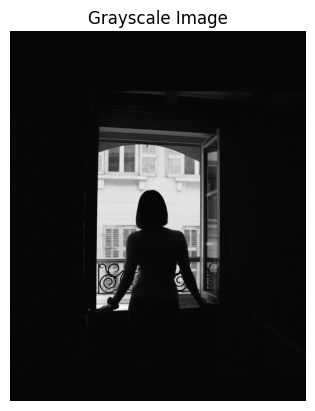

In [74]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_color = cv.imread(
    '/content/drive/MyDrive/IN4640/Images/originals/looking_out.jpg'
)

if img_color is None:
    raise ValueError("Image not loaded. Check path or filename.")

gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

Otsu threshold value: 101.0


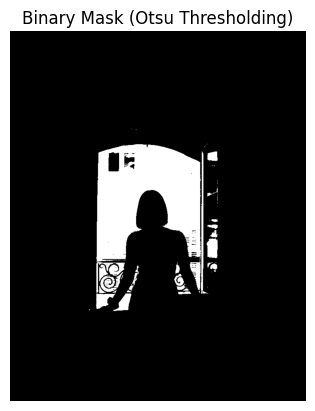

In [75]:
threshold, binary_mask = cv.threshold(
    gray, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU
)

print("Otsu threshold value:", threshold)

plt.imshow(binary_mask, cmap='gray')
plt.title('Binary Mask (Otsu Thresholding)')
plt.axis('off')
plt.show()

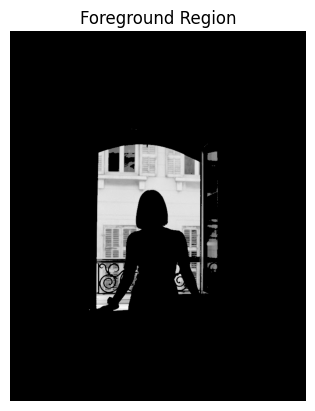

In [76]:
foreground = gray.copy()
foreground[binary_mask == 0] = 0

plt.imshow(foreground, cmap='gray')
plt.title('Foreground Region')
plt.axis('off')
plt.show()

In [77]:
def foreground_hist_equalization(gray_img, mask):
    # Get foreground pixels only
    fg_pixels = gray_img[mask > 0]

    # Compute histogram
    hist, bins = np.histogram(fg_pixels, 256, [0, 256])

    # Compute CDF
    cdf = hist.cumsum()
    cdf = cdf * 255 / cdf[-1]

    # Equalize foreground pixels
    eq_pixels = np.interp(fg_pixels, bins[:-1], cdf)

    # Create output image
    output = gray_img.copy()
    output[mask > 0] = eq_pixels.astype(np.uint8)

    return output

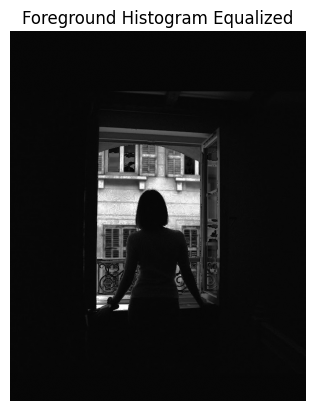

In [78]:
foreground_eq = foreground_hist_equalization(gray, binary_mask)

plt.imshow(foreground_eq, cmap='gray')
plt.title('Foreground Histogram Equalized')
plt.axis('off')
plt.show()

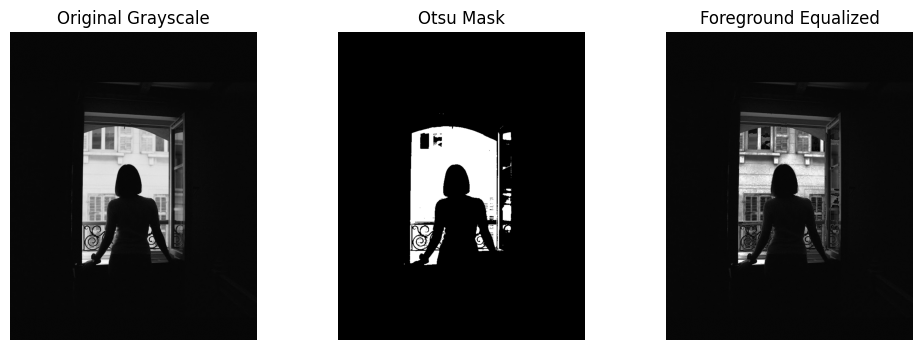

In [79]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(gray, cmap='gray')
plt.title('Original Grayscale')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(binary_mask, cmap='gray')
plt.title('Otsu Mask')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(foreground_eq, cmap='gray')
plt.title('Foreground Equalized')
plt.axis('off')

plt.show()

In [80]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [81]:
size = 5
sigma = 2

# Create coordinate grid
ax = np.linspace(-(size//2), size//2, size)
xx, yy = np.meshgrid(ax, ax)

# Gaussian formula
gaussian_kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))

# Normalize kernel
gaussian_kernel /= gaussian_kernel.sum()

print("5x5 Gaussian Kernel (σ = 2):")
print(gaussian_kernel)
print("Sum of kernel values:", gaussian_kernel.sum())

5x5 Gaussian Kernel (σ = 2):
[[0.02324684 0.03382395 0.03832756 0.03382395 0.02324684]
 [0.03382395 0.04921356 0.05576627 0.04921356 0.03382395]
 [0.03832756 0.05576627 0.06319146 0.05576627 0.03832756]
 [0.03382395 0.04921356 0.05576627 0.04921356 0.03382395]
 [0.02324684 0.03382395 0.03832756 0.03382395 0.02324684]]
Sum of kernel values: 1.0


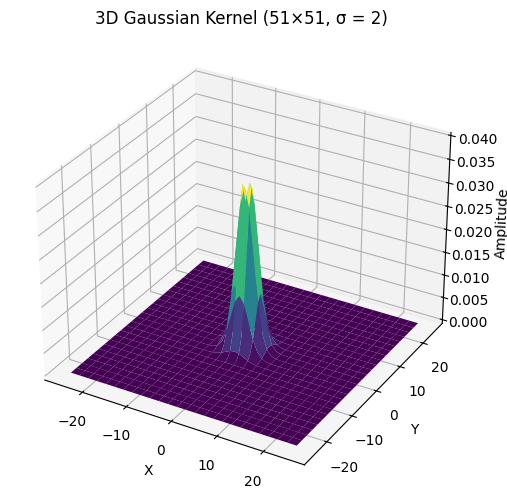

In [82]:
size = 51
sigma = 2

ax = np.linspace(-(size//2), size//2, size)
xx, yy = np.meshgrid(ax, ax)

gaussian_51 = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
gaussian_51 /= gaussian_51.sum()

fig = plt.figure(figsize=(8,6))
ax3d = fig.add_subplot(111, projection='3d')
ax3d.plot_surface(xx, yy, gaussian_51, cmap='viridis')

ax3d.set_title('3D Gaussian Kernel (51×51, σ = 2)')
ax3d.set_xlabel('X')
ax3d.set_ylabel('Y')
ax3d.set_zlabel('Amplitude')

plt.show()

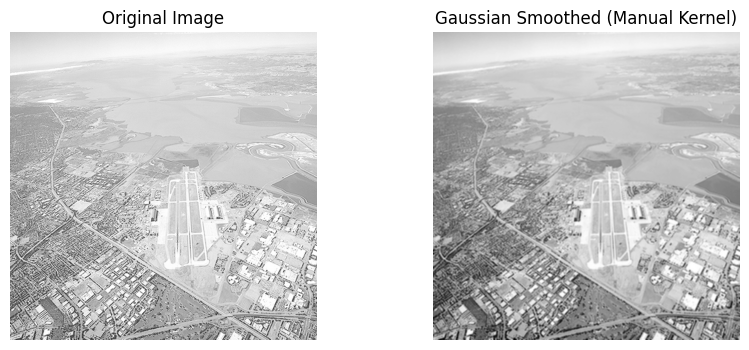

In [83]:
# Load a grayscale image (reuse runway image)
img = cv.imread(
    '/content/drive/MyDrive/IN4640/Images/originals/runway.png',
    cv.IMREAD_GRAYSCALE
)

if img is None:
    raise ValueError("Image not loaded.")

# Apply manual Gaussian smoothing
blur_manual = cv.filter2D(img, -1, gaussian_kernel)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(blur_manual, cmap='gray')
plt.title('Gaussian Smoothed (Manual Kernel)')
plt.axis('off')

plt.show()

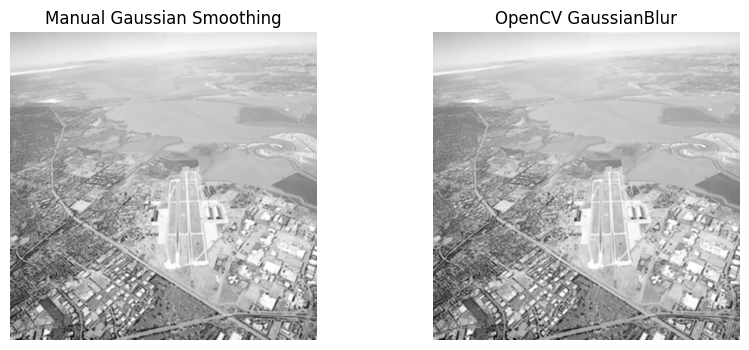

In [84]:
blur_cv = cv.GaussianBlur(img, (5,5), sigma)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(blur_manual, cmap='gray')
plt.title('Manual Gaussian Smoothing')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(blur_cv, cmap='gray')
plt.title('OpenCV GaussianBlur')
plt.axis('off')

plt.show()

In [85]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

size = 5
sigma = 2

ax = np.linspace(-(size//2), size//2, size)
xx, yy = np.meshgrid(ax, ax)

# Gaussian
G = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))

# Derivatives of Gaussian
Gx = -(xx / (sigma**2)) * G
Gy = -(yy / (sigma**2)) * G

# Normalize (optional but good practice)
Gx /= np.sum(np.abs(Gx))
Gy /= np.sum(np.abs(Gy))

print("5x5 Derivative of Gaussian (X direction):")
print(Gx)

print("\n5x5 Derivative of Gaussian (Y direction):")
print(Gy)

5x5 Derivative of Gaussian (X direction):
[[ 0.04413011  0.03210446 -0.         -0.03210446 -0.04413011]
 [ 0.06420893  0.04671172 -0.         -0.04671172 -0.06420893]
 [ 0.07275825  0.05293131 -0.         -0.05293131 -0.07275825]
 [ 0.06420893  0.04671172 -0.         -0.04671172 -0.06420893]
 [ 0.04413011  0.03210446 -0.         -0.03210446 -0.04413011]]

5x5 Derivative of Gaussian (Y direction):
[[ 0.04413011  0.06420893  0.07275825  0.06420893  0.04413011]
 [ 0.03210446  0.04671172  0.05293131  0.04671172  0.03210446]
 [-0.         -0.         -0.         -0.         -0.        ]
 [-0.03210446 -0.04671172 -0.05293131 -0.04671172 -0.03210446]
 [-0.04413011 -0.06420893 -0.07275825 -0.06420893 -0.04413011]]


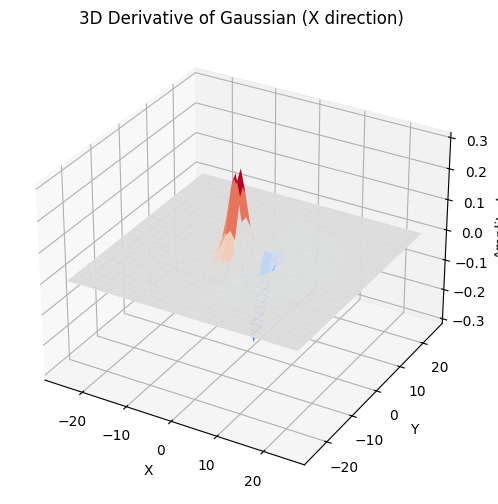

In [86]:
size = 51
sigma = 2

ax = np.linspace(-(size//2), size//2, size)
xx, yy = np.meshgrid(ax, ax)

G = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
Gx_51 = -(xx / (sigma**2)) * G

fig = plt.figure(figsize=(8,6))
ax3d = fig.add_subplot(111, projection='3d')
ax3d.plot_surface(xx, yy, Gx_51, cmap='coolwarm')

ax3d.set_title('3D Derivative of Gaussian (X direction)')
ax3d.set_xlabel('X')
ax3d.set_ylabel('Y')
ax3d.set_zlabel('Amplitude')

plt.show()

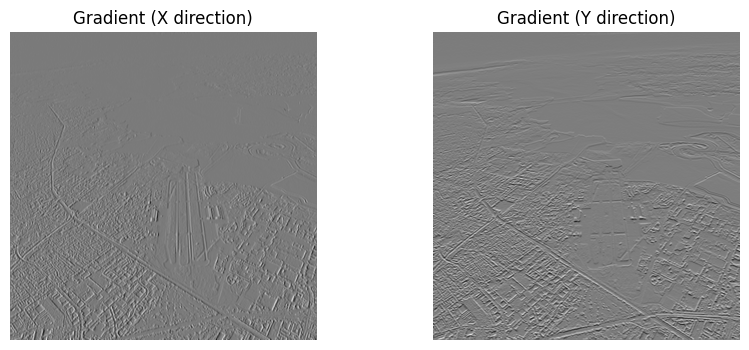

In [87]:
# Load grayscale image
img = cv.imread(
    '/content/drive/MyDrive/IN4640/Images/originals/runway.png',
    cv.IMREAD_GRAYSCALE
)

if img is None:
    raise ValueError("Image not loaded.")

# Apply derivative-of-Gaussian filtering
grad_x = cv.filter2D(img, cv.CV_64F, Gx)
grad_y = cv.filter2D(img, cv.CV_64F, Gy)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(grad_x, cmap='gray')
plt.title('Gradient (X direction)')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(grad_y, cmap='gray')
plt.title('Gradient (Y direction)')
plt.axis('off')

plt.show()

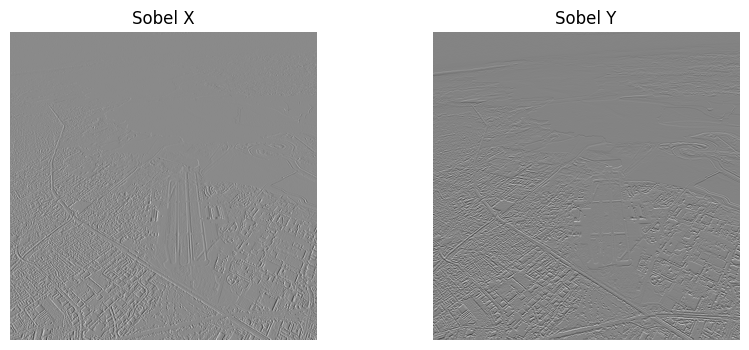

In [88]:
sobel_x = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)
sobel_y = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(sobel_x, cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(sobel_y, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

plt.show()

In [89]:
very_small = cv.imread(
    '/content/drive/MyDrive/IN4640/Images/originals/taylor_very_small.jpg.jpeg',
    cv.IMREAD_GRAYSCALE
)

small = cv.imread(
    '/content/drive/MyDrive/IN4640/Images/originals/taylor_small.jpg.jpeg',
    cv.IMREAD_GRAYSCALE
)

normal = cv.imread(
    '/content/drive/MyDrive/IN4640/Images/originals/taylor.jpg.jpeg',
    cv.IMREAD_GRAYSCALE
)

if very_small is None or small is None or normal is None:
    raise ValueError("One or more images not loaded.")

In [90]:
import numpy as np

def zoom_nearest(img, scale):
    h, w = img.shape
    new_h = int(h * scale)
    new_w = int(w * scale)

    zoomed = np.zeros((new_h, new_w), dtype=img.dtype)

    for i in range(new_h):
        for j in range(new_w):
            x = int(i / scale)
            y = int(j / scale)
            zoomed[i, j] = img[x, y]

    return zoomed


def zoom_bilinear(img, scale):
    h, w = img.shape
    new_h = int(h * scale)
    new_w = int(w * scale)

    zoomed = np.zeros((new_h, new_w), dtype=np.float32)

    for i in range(new_h):
        for j in range(new_w):
            x = i / scale
            y = j / scale

            x0 = int(np.floor(x))
            y0 = int(np.floor(y))
            x1 = min(x0 + 1, h - 1)
            y1 = min(y0 + 1, w - 1)

            dx = x - x0
            dy = y - y0

            zoomed[i, j] = (
                (1 - dx) * (1 - dy) * img[x0, y0] +
                dx * (1 - dy) * img[x1, y0] +
                (1 - dx) * dy * img[x0, y1] +
                dx * dy * img[x1, y1]
            )

    return zoomed.astype(img.dtype)

In [91]:
scale_vs = normal.shape[0] / very_small.shape[0]

zoom_vs_nn = zoom_nearest(very_small, scale_vs)
zoom_vs_bl = zoom_bilinear(very_small, scale_vs)

# Scale factors to match normal image size
scale_vs = normal.shape[0] / very_small.shape[0]
scale_s  = normal.shape[0] / small.shape[0]

print("Scale (very small → normal):", scale_vs)
print("Scale (small → normal):", scale_s)

Scale (very small → normal): 20.0
Scale (small → normal): 5.0


In [92]:
zoom_vs_nn = zoom_nearest(very_small, scale_vs)
zoom_vs_bl = zoom_bilinear(very_small, scale_vs)

In [93]:
zoom_s_nn = zoom_nearest(small, scale_s)
zoom_s_bl = zoom_bilinear(small, scale_s)

In [94]:
h, w = normal.shape

zoom_vs_nn = zoom_vs_nn[:h, :w]
zoom_vs_bl = zoom_vs_bl[:h, :w]

zoom_s_nn = zoom_s_nn[:h, :w]
zoom_s_bl = zoom_s_bl[:h, :w]

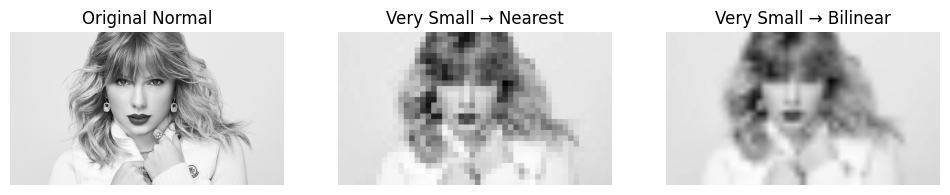

In [95]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(normal, cmap='gray')
plt.title('Original Normal')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(zoom_vs_nn, cmap='gray')
plt.title('Very Small → Nearest')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(zoom_vs_bl, cmap='gray')
plt.title('Very Small → Bilinear')
plt.axis('off')

plt.show()

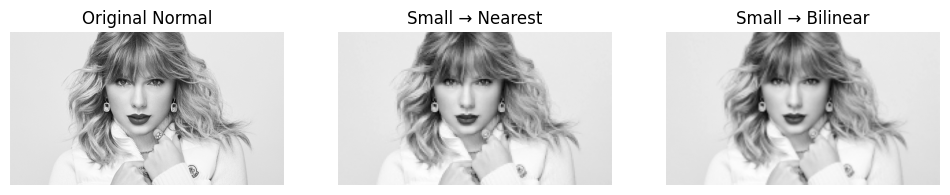

In [96]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(normal, cmap='gray')
plt.title('Original Normal')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(zoom_s_nn, cmap='gray')
plt.title('Small → Nearest')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(zoom_s_bl, cmap='gray')
plt.title('Small → Bilinear')
plt.axis('off')

plt.show()

In [97]:
def normalized_ssd(img1, img2):
    img1 = img1.astype(np.float32)
    img2 = img2.astype(np.float32)
    return np.mean((img1 - img2) ** 2) / (np.mean(img1 ** 2) + 1e-8)

In [98]:
ssd_vs_nn = normalized_ssd(normal, zoom_vs_nn)
ssd_vs_bl = normalized_ssd(normal, zoom_vs_bl)

ssd_s_nn = normalized_ssd(normal, zoom_s_nn)
ssd_s_bl = normalized_ssd(normal, zoom_s_bl)

print("SSD (Very Small → Nearest):", ssd_vs_nn)
print("SSD (Very Small → Bilinear):", ssd_vs_bl)

print("SSD (Small → Nearest):", ssd_s_nn)
print("SSD (Small → Bilinear):", ssd_s_bl)

SSD (Very Small → Nearest): 0.011422604
SSD (Very Small → Bilinear): 0.015288362
SSD (Small → Nearest): 0.0056895283
SSD (Small → Bilinear): 0.006787338


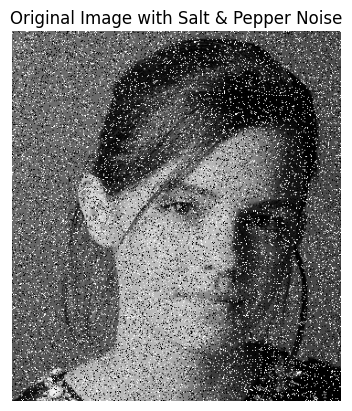

In [100]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

noisy = cv.imread(
    '/content/drive/MyDrive/IN4640/Images/originals/emma_salt_pepper.jpg',
    cv.IMREAD_GRAYSCALE
)

if noisy is None:
    raise ValueError("Noisy image not loaded.")

plt.imshow(noisy, cmap='gray')
plt.title('Original Image with Salt & Pepper Noise')
plt.axis('off')
plt.show()

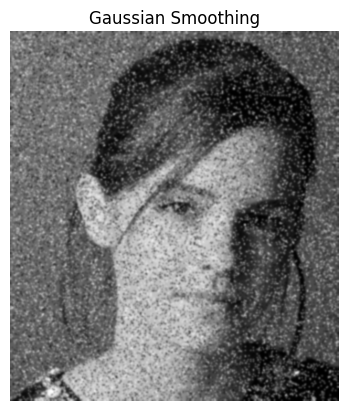

In [101]:
gaussian_filtered = cv.GaussianBlur(noisy, (5,5), 1)

plt.imshow(gaussian_filtered, cmap='gray')
plt.title('Gaussian Smoothing')
plt.axis('off')
plt.show()

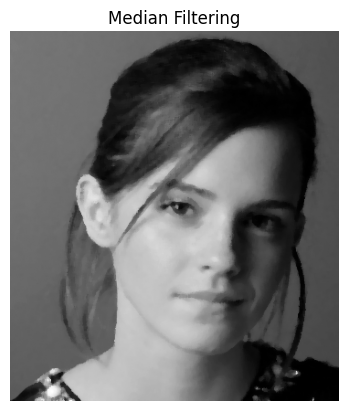

In [102]:
median_filtered = cv.medianBlur(noisy, 5)

plt.imshow(median_filtered, cmap='gray')
plt.title('Median Filtering')
plt.axis('off')
plt.show()

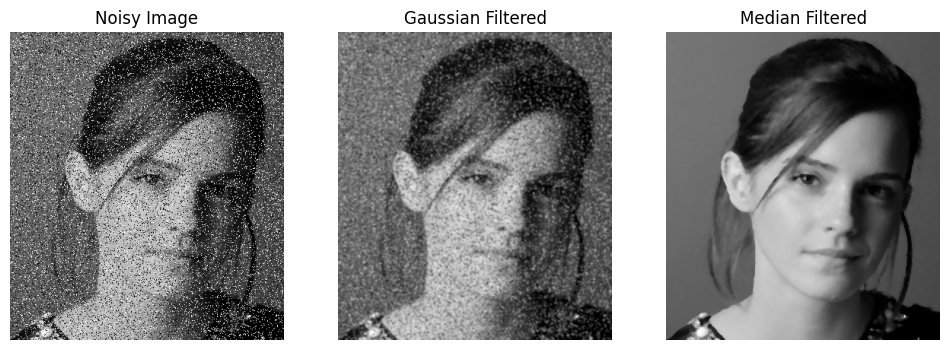

In [103]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(noisy, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title('Gaussian Filtered')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(median_filtered, cmap='gray')
plt.title('Median Filtered')
plt.axis('off')

plt.show()

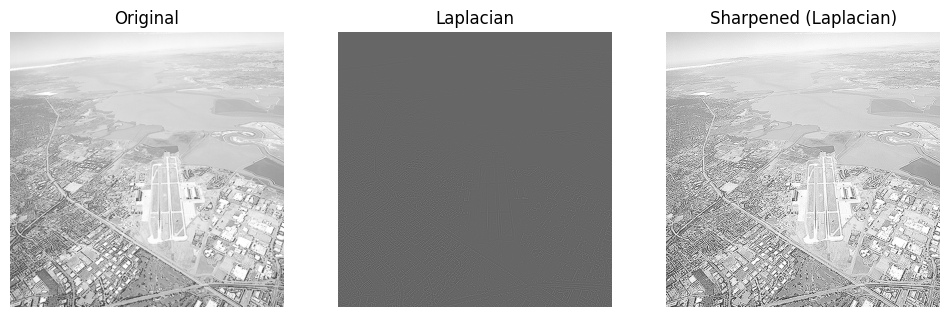

In [104]:
# Compute Laplacian
laplacian = cv.Laplacian(img, cv.CV_64F)

# Sharpen image
sharpened_lap = img - laplacian

# Convert to uint8 safely
sharpened_lap = np.clip(sharpened_lap, 0, 255).astype(np.uint8)

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(sharpened_lap, cmap='gray')
plt.title('Sharpened (Laplacian)')
plt.axis('off')

plt.show()

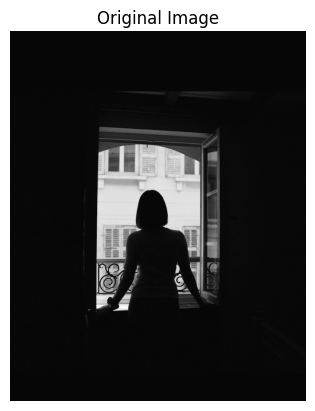

In [106]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(
    '/content/drive/MyDrive/IN4640/Images/originals/looking_out.jpg',
    cv.IMREAD_GRAYSCALE
)

if img is None:
    raise ValueError("Image not loaded.")

plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

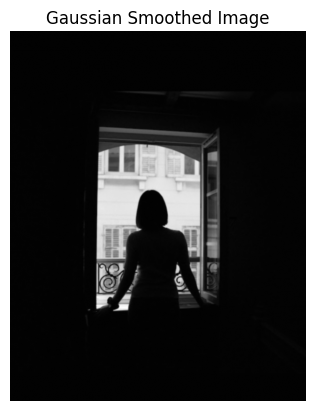

In [107]:
blur = cv.GaussianBlur(img, (5,5), 1)

plt.imshow(blur, cmap='gray')
plt.title('Gaussian Smoothed Image')
plt.axis('off')
plt.show()

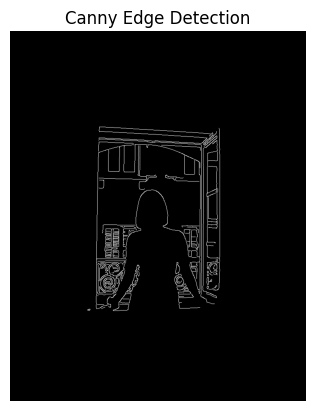

In [108]:
edges = cv.Canny(blur, threshold1=50, threshold2=150)

plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')
plt.show()

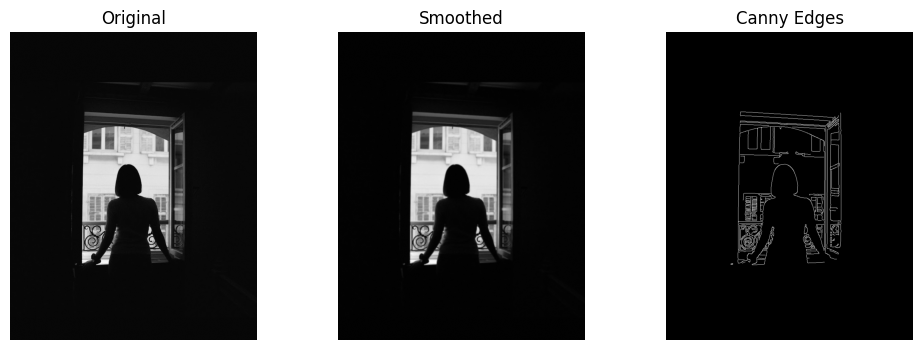

In [109]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(blur, cmap='gray')
plt.title('Smoothed')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')

plt.show()